# Assignment 1

1.   Pongsarat C. 6310412018 : (25%) ​Find dataset, Data cleansing and preparation, Develop Linear Regression Model, Develop initial Deep Learning Model, Result Summarization
2.   Theethut N. 6310412021 : (25%) Experimental variation on activation fn. and learning rate
3.   Saranchai A. 6310412024 : (25%) Experimental variation on number of neuron and number of layer
4.   Krittipat C. 6420400001 : (25%) Experimental variation on number of epoch and batch size


In [ ]:
#TEST GPU
!nvidia-smi -L
# 1. Chnage runtime: 
#     Runtime > Chenge runtime type > GPU
# 2. test with !nvidia-smi -L
 
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

GPU 0: Tesla K80 (UUID: GPU-341f5495-eb16-d122-ea6a-2c0bca0e1444)


1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.callbacks import TensorBoard

#Set random seed
np.random.seed(1)
tf.random.set_seed(2)

In [ ]:
#USE GDRIVE?
use_gdrive = False

if use_gdrive:
  from google.colab import drive
  drive.mount('/gdrive')

In [ ]:
#if not use_gdrive:
  #colab local drive
  #df = pd.read_csv('sample_data/CO2 Emissions_Canada.csv')
#else:
  #google drive
 # df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/CO2 Emissions_Canada.csv')
#from google.colab import files
#uploaded = files.upload()
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.tail(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [ ]:
# Cat to Num by cat.codes
# df['Fuel Type'] = df['Fuel Type'].astype('category')
# print(df.dtypes)
# df["Fuel Type_cat"] = df["Fuel Type"].cat.codes
# display(df)

#DATA MANIPULATION BY P'YIM
df = df.drop(columns=['Make', 'Model', 'Transmission'])

df_final = pd.get_dummies(df)

cols_to_norm = ['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']
df_final[cols_to_norm] = MinMaxScaler().fit_transform(df_final[cols_to_norm])

df_final['CO2 Emission(g/km)'] = df_final['CO2 Emissions(g/km)']
df_final = df_final.drop(columns=['CO2 Emissions(g/km)'])

print(df_final.shape)
df_final.tail(5)

(7385, 28)


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,CO2 Emission(g/km)
7380,0.146667,0.076923,0.246212,0.222892,0.240909,0.327586,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,219
7381,0.146667,0.076923,0.265152,0.259036,0.263636,0.310345,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,232
7382,0.146667,0.076923,0.284091,0.277108,0.281818,0.275862,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,240
7383,0.146667,0.076923,0.265152,0.259036,0.263636,0.310345,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,232
7384,0.146667,0.076923,0.303030,0.283133,0.300000,0.258621,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,248


In [ ]:
#Feature Selection
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

cv = KFold(n_splits=10, shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y = df_final['CO2 Emission(g/km)']

vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ]
for val in vals:
  print('val:', val)
  features = abs(df_final.corr()['CO2 Emission(g/km)'][abs(df_final.corr()['CO2 Emission(g/km)']) > val].drop('CO2 Emission(g/km)')).index.tolist()
  x = df_final.drop(columns = 'CO2 Emission(g/km)')
  x = x[features]
  print(features)
  y_pred = cross_val_predict(classifier_pipeline, x, y, cv = cv)
  print('RMSE:', round(sqrt(mean_squared_error(y,y_pred)),2))
  print('R-Squared:', round(r2_score(y,y_pred),2))
  print()

val: 0.1
['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'Vehicle Class_COMPACT', 'Vehicle Class_MID-SIZE', 'Vehicle Class_PICKUP TRUCK - STANDARD', 'Vehicle Class_STATION WAGON - SMALL', 'Vehicle Class_SUV - SMALL', 'Vehicle Class_SUV - STANDARD', 'Vehicle Class_TWO-SEATER', 'Vehicle Class_VAN - CARGO', 'Vehicle Class_VAN - PASSENGER', 'Fuel Type_X', 'Fuel Type_Z']
RMSE: 7.23
R-Squared: 0.98

val: 0.2
['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'Vehicle Class_COMPACT', 'Vehicle Class_MID-SIZE', 'Vehicle Class_PICKUP TRUCK - STANDARD', 'Vehicle Class_SUV - STANDARD', 'Vehicle Class_VAN - PASSENGER', 'Fuel Type_X', 'Fuel Type_Z']
RMSE: 6.81
R-Squared: 0.99

val: 0.3
['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Cons

In [ ]:
#train test split
test_size = 0.2
train, test = train_test_split(df_final, test_size = test_size, random_state = 3)

#define x and y
x_train = train.iloc[:, 0:27]
y_train = train.iloc[:, 27]
x_test = test.iloc[:, 0:27]
y_test = test.iloc[:, 27]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print(f'Training Instance: {len(x_train)}')
print(f'Testing Instance: {len(x_test)}')

'''
https://stackoverflow.com/questions/35050753/how-big-should-batch-size-and-number-of-epochs-be-when-fitting-a-model-in-keras

Since you have a pretty small dataset (~ 1000 samples), you would probably be safe using a batch size of 32, which is pretty standard. It won't make a huge difference for your problem unless you're training on hundreds of thousands or millions of observations.

To answer your questions on Batch Size and Epochs:

In general: Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes train slower, but can converge faster. It's definitely problem dependent.

In general, the models improve with more epochs of training, to a point. They'll start to plateau in accuracy as they converge. Try something like 50 and plot number of epochs (x axis) vs. accuracy (y axis). You'll see where it levels out.

What is the type and/or shape of your data? Are these images, or just tabular data? This is an important detail.
'''

(5908, 27) (5908,) (1477, 27) (1477,)
Training Instance: 5908
Testing Instance: 1477


"\nhttps://stackoverflow.com/questions/35050753/how-big-should-batch-size-and-number-of-epochs-be-when-fitting-a-model-in-keras\n\nSince you have a pretty small dataset (~ 1000 samples), you would probably be safe using a batch size of 32, which is pretty standard. It won't make a huge difference for your problem unless you're training on hundreds of thousands or millions of observations.\n\nTo answer your questions on Batch Size and Epochs:\n\nIn general: Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes train slower, but can converge faster. It's definitely problem dependent.\n\nIn general, the models improve with more epochs of training, to a point. They'll start to plateau in accuracy as they converge. Try something like 50 and plot number of epochs (x axis) vs. accuracy (y axis). You'll see where it levels out.\n\nWhat is the type and/or shape of your data? Are these images, or just tabular data? This is an important d

RMSE: 4.5507
R-Squared: 0.9938


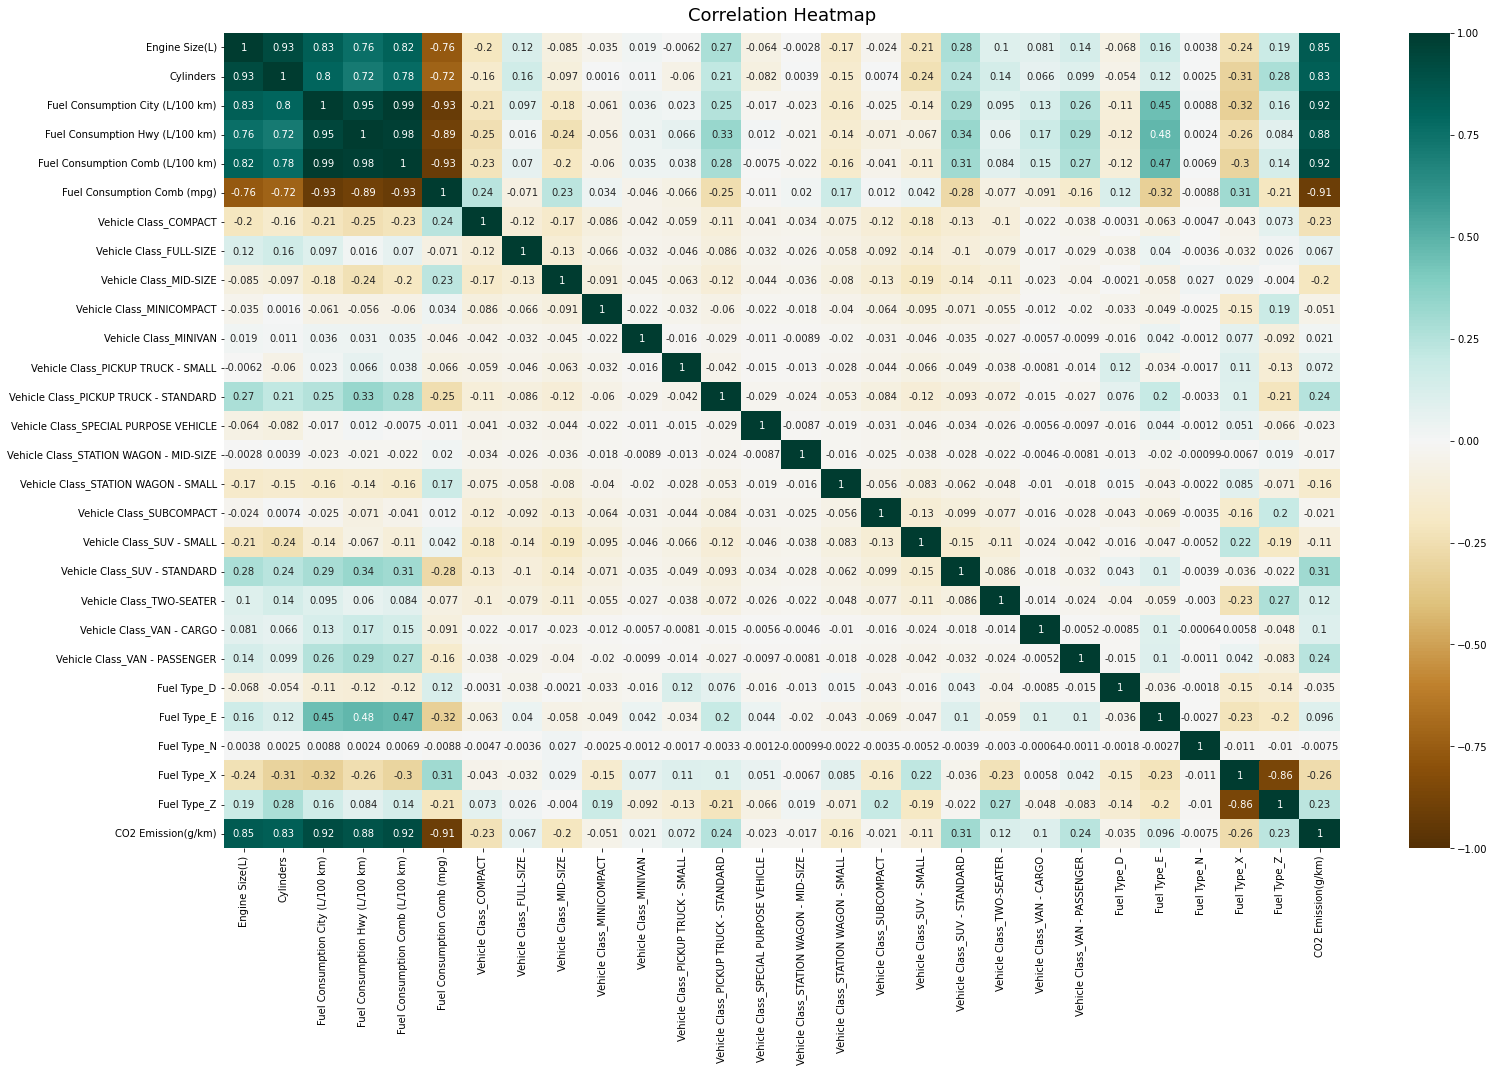

In [ ]:
#LINEAR REGRESSION
#Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Create model
model_linearreg = LinearRegression().fit(x_train, y_train)

#Predict y
y_predict = model_linearreg.predict(x_test)

#RMSE
print('RMSE:', round(mean_squared_error(y_test, y_predict, squared=False),4))

#R^2
print('R-Squared:', round(r2_score(y_test,y_predict),4))

#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation Heatmap
plt.figure(figsize=(25, 15))
heatmap = sns.heatmap(df_final.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Deep learning
## Tuning neuron and layer

In [ ]:
#DL BASELINE
neuron = 32
layer = 3
batch_size = 50
epoch = 200
activation = 'relu'
learning_rate = 0.001
momentum_decay = 0.9 #default : https://keras.io/api/optimizers/adam/
model_name = 'baseline_dl'

#BUILD MODEL
keras.backend.clear_session()

model = tf.keras.models.Sequential()

######################################################
model.add(tf.keras.Input(shape=(x_train.shape[1],), name='input'))

name_layer = 0
for i in range(layer):
  name_layer += 1
  model.add(tf.keras.layers.Dense(neuron,activation = activation, kernel_initializer = 'glorot_uniform', name = f'h{name_layer}'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.BatchNormalization(axis = -1, name = f'bn{name_layer}'))

model.add(tf.keras.layers.Dense(1, name='output'))
######################################################

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=momentum_decay, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'), \
              loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Model weights are saved at the end of every epoch, if it's the best seen so far.
#checkpoint_filepath = '/gdrive/MyDrive/Colab Notebooks/BADS7604/model/bestmodel_epoch{epoch:02d}_valloss{val_loss:2f}.hdf5'
if not use_gdrive:
  #local drive
  checkpoint_filepath = f'bestmodel_{model_name}.hdf5'
else:
  #google drive
  checkpoint_filepath = f'/gdrive/MyDrive/Colab Notebooks/BADS7604/model/bestmodel_{model_name}.hdf5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='loss', mode='min', save_best_only=True)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_split=0.2, callbacks=[model_checkpoint_callback])

#Load best saved model
#https://keras.io/api/callbacks/model_checkpoint/
model.load_weights(checkpoint_filepath)

loss, metric = model.evaluate(x_test, y_test, verbose=1)
print(f'Model({neuron} neuron, {layer} layer): LOSS={loss}, METRIC={metric}')

keras.backend.clear_session()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 32)                896       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 h2 (Dense)                  (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 bn2 (BatchNormalization)    (None, 32)                128       
                                                                 
 h3 (Dense)                  (None, 32)                1

# Tuning epoch and batch_size

In [ ]:
batch_size = [50,100,150,200]
epoch = [50,100,200]
loss_list_all = []
metric_list_all = []


#DL batch size and epoch
neuron = 32
layer = 3
#batch_size = 50
#epoch = 200
activation = 'relu'
learning_rate = 0.001
momentum_decay = 0.9 #default : https://keras.io/api/optimizers/adam/
model_name = 'baseline_dl'

#BUILD MODEL
keras.backend.clear_session()

model = tf.keras.models.Sequential()

######################################################
model.add(tf.keras.Input(shape=(x_train.shape[1],), name='input'))

name_layer = 0
for i in range(layer):
    name_layer += 1
    model.add(tf.keras.layers.Dense(neuron,activation = activation, kernel_initializer = 'glorot_uniform', name = f'h{name_layer}'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.BatchNormalization(axis = -1, name = f'bn{name_layer}'))

model.add(tf.keras.layers.Dense(1, name='output'))
######################################################

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=momentum_decay, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'), \
              loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Model weights are saved at the end of every epoch, if it's the best seen so far.
#checkpoint_filepath = '/gdrive/MyDrive/Colab Notebooks/BADS7604/model/bestmodel_epoch{epoch:02d}_valloss{val_loss:2f}.hdf5'
if not use_gdrive:
  #local drive
  checkpoint_filepath = f'model/bestmodel_{model_name}.hdf5'
else:
  #google drive
  checkpoint_filepath = f'/gdrive/MyDrive/Colab Notebooks/BADS7604/model/bestmodel_{model_name}.hdf5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='loss', mode='min', save_best_only=True)
for bs in batch_size:
    loss_list = []
    metric_list = []
    for ep in epoch:
        model.fit(x_train, y_train, batch_size=bs, epochs=ep, verbose=0, validation_split=0.2, callbacks=[model_checkpoint_callback])
        #Load best saved model
        #https://keras.io/api/callbacks/model_checkpoint/
        model.load_weights(checkpoint_filepath)

        loss, metric = model.evaluate(x_test, y_test, verbose=1)
        print(f'Model({bs} batch size, {ep} epoch): LOSS={loss}, METRIC={metric}')
        loss_list.append(loss)
        metric_list.append(metric)
        
        keras.backend.clear_session()
    loss_list_all.append(loss_list) #50bs[50ep 100ep 200ep], 100bs[50ep 100ep 200ep]
    metric_list_all.append(metric_list)
    
        
        

In [ ]:
# create seabvorn heatmap with required labels
ax = sns.heatmap(loss_list_all, xticklabels=epoch, yticklabels=batch_size, annot=True, fmt=".2f")

plt.title('Model MSE Comparison', fontsize = 20) # title with fontsize 20
plt.xlabel('Epoch', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Batch Size', fontsize = 15) # y-axis label with fontsize 15

plt.show()

In [ ]:
# create seabvorn heatmap with required labels
ax = sns.heatmap(metric_list_all, xticklabels=epoch, yticklabels=batch_size, annot=True, fmt=".2f")

plt.title('Model RMSE Comparison', fontsize = 20) # title with fontsize 20
plt.xlabel('Epoch', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Batch Size', fontsize = 15) # y-axis label with fontsize 15

plt.show()

# Tuning activation function and learning rate

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

def create_model(activation='relu'):
	# create model
  keras.backend.clear_session()

  model = tf.keras.models.Sequential()

  model.add(tf.keras.Input(shape = (x_train.shape[1],)))

  model.add(tf.keras.layers.Dense(32,activation = activation, kernel_initializer = 'glorot_uniform', name = 'h1'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.BatchNormalization(axis = -1, name = 'bn1'))
  model.add(tf.keras.layers.Dense(32,activation = activation, kernel_initializer = 'glorot_uniform', name = 'h2'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.BatchNormalization(axis = -1, name = 'bn2'))
  model.add(tf.keras.layers.Dense(32,activation = activation, kernel_initializer = 'glorot_uniform', name = 'h3'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.BatchNormalization(axis = -1, name = 'bn3'))

  model.add(tf.keras.layers.Dense(1, name = 'output'))

	# Compile model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 0.00000001),
              loss='mean_squared_error',
              metrics = [tf.keras.metrics.RootMeanSquaredError()]
              )
  return model

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = KerasRegressor(build_fn=create_model, batch_size = 50, epochs = 200, verbose = 1, validation_split = 0.2)
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-9-726a2c3de132>:39: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasRegressor(build_fn=create_model, batch_size = 50, epochs = 200, verbose = 1, validation_split = 0.2)


Epoch 1/200
95/95 [==============================] - 2s 6ms/step - loss: 66126.2656 - root_mean_squared_error: 257.1503 - val_loss: 64140.8516 - val_root_mean_squared_error: 253.2604
Epoch 2/200
95/95 [==============================] - 0s 3ms/step - loss: 64801.7930 - root_mean_squared_error: 254.5620 - val_loss: 62396.9766 - val_root_mean_squared_error: 249.7939
Epoch 3/200
95/95 [==============================] - 0s 3ms/step - loss: 62799.1680 - root_mean_squared_error: 250.5976 - val_loss: 61517.2656 - val_root_mean_squared_error: 248.0267
Epoch 4/200
95/95 [==============================] - 0s 3ms/step - loss: 60231.8828 - root_mean_squared_error: 245.4218 - val_loss: 58844.8203 - val_root_mean_squared_error: 242.5795
Epoch 5/200
95/95 [==============================] - 0s 3ms/step - loss: 57148.5352 - root_mean_squared_error: 239.0576 - val_loss: 55414.4922 - val_root_mean_squared_error: 235.4028
Epoch 6/200
95/95 [==============================] - 0s 3ms/step - loss: 53641.8516 -

95/95 [==============================] - 0s 3ms/step - loss: 417.6812 - root_mean_squared_error: 20.4373 - val_loss: 57.4528 - val_root_mean_squared_error: 7.5798
Epoch 47/200
95/95 [==============================] - 0s 3ms/step - loss: 450.4244 - root_mean_squared_error: 21.2232 - val_loss: 59.1814 - val_root_mean_squared_error: 7.6929
Epoch 48/200
95/95 [==============================] - 0s 4ms/step - loss: 432.2475 - root_mean_squared_error: 20.7906 - val_loss: 61.9599 - val_root_mean_squared_error: 7.8715
Epoch 49/200
95/95 [==============================] - 0s 3ms/step - loss: 421.7519 - root_mean_squared_error: 20.5366 - val_loss: 64.2929 - val_root_mean_squared_error: 8.0183
Epoch 50/200
95/95 [==============================] - 0s 3ms/step - loss: 436.8082 - root_mean_squared_error: 20.9000 - val_loss: 66.5381 - val_root_mean_squared_error: 8.1571
Epoch 51/200
95/95 [==============================] - 0s 3ms/step - loss: 418.3778 - root_mean_squared_error: 20.4543 - val_loss: 60.

95/95 [==============================] - 0s 3ms/step - loss: 433.0084 - root_mean_squared_error: 20.8089 - val_loss: 61.2979 - val_root_mean_squared_error: 7.8293
Epoch 93/200
95/95 [==============================] - 0s 3ms/step - loss: 415.0720 - root_mean_squared_error: 20.3733 - val_loss: 54.7396 - val_root_mean_squared_error: 7.3986
Epoch 94/200
95/95 [==============================] - 0s 3ms/step - loss: 441.0848 - root_mean_squared_error: 21.0020 - val_loss: 55.7450 - val_root_mean_squared_error: 7.4663
Epoch 95/200
95/95 [==============================] - 0s 3ms/step - loss: 405.8830 - root_mean_squared_error: 20.1465 - val_loss: 54.1281 - val_root_mean_squared_error: 7.3572
Epoch 96/200
95/95 [==============================] - 0s 3ms/step - loss: 428.5426 - root_mean_squared_error: 20.7013 - val_loss: 54.2860 - val_root_mean_squared_error: 7.3679
Epoch 97/200
95/95 [==============================] - 0s 3ms/step - loss: 409.4300 - root_mean_squared_error: 20.2344 - val_loss: 60.

95/95 [==============================] - 0s 3ms/step - loss: 409.9944 - root_mean_squared_error: 20.2483 - val_loss: 53.7243 - val_root_mean_squared_error: 7.3297
Epoch 139/200
95/95 [==============================] - 0s 3ms/step - loss: 415.3909 - root_mean_squared_error: 20.3811 - val_loss: 55.3523 - val_root_mean_squared_error: 7.4399
Epoch 140/200
95/95 [==============================] - 0s 3ms/step - loss: 406.1182 - root_mean_squared_error: 20.1524 - val_loss: 56.7512 - val_root_mean_squared_error: 7.5333
Epoch 141/200
95/95 [==============================] - 0s 3ms/step - loss: 433.9973 - root_mean_squared_error: 20.8326 - val_loss: 56.6874 - val_root_mean_squared_error: 7.5291
Epoch 142/200
95/95 [==============================] - 0s 3ms/step - loss: 410.6117 - root_mean_squared_error: 20.2636 - val_loss: 56.0302 - val_root_mean_squared_error: 7.4853
Epoch 143/200
95/95 [==============================] - 0s 3ms/step - loss: 429.8341 - root_mean_squared_error: 20.7324 - val_loss

95/95 [==============================] - 0s 3ms/step - loss: 423.5547 - root_mean_squared_error: 20.5804 - val_loss: 58.2794 - val_root_mean_squared_error: 7.6341
Epoch 185/200
95/95 [==============================] - 0s 3ms/step - loss: 424.6099 - root_mean_squared_error: 20.6061 - val_loss: 62.6887 - val_root_mean_squared_error: 7.9176
Epoch 186/200
95/95 [==============================] - 0s 3ms/step - loss: 421.6897 - root_mean_squared_error: 20.5351 - val_loss: 60.2975 - val_root_mean_squared_error: 7.7651
Epoch 187/200
95/95 [==============================] - 0s 3ms/step - loss: 436.8909 - root_mean_squared_error: 20.9019 - val_loss: 61.9668 - val_root_mean_squared_error: 7.8719
Epoch 188/200
95/95 [==============================] - 0s 3ms/step - loss: 430.4867 - root_mean_squared_error: 20.7482 - val_loss: 57.9409 - val_root_mean_squared_error: 7.6119
Epoch 189/200
95/95 [==============================] - 0s 3ms/step - loss: 447.2463 - root_mean_squared_error: 21.1482 - val_loss

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

def create_model(learn_rate=0.001):
	# create model
  keras.backend.clear_session()

  model = tf.keras.models.Sequential()
  model.add(tf.keras.Input(shape = (x_train.shape[1],)))

  model.add(tf.keras.layers.Dense(32,activation = 'relu', kernel_initializer = 'glorot_uniform', name = 'h1'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.BatchNormalization(axis = -1, name = 'bn1'))
  model.add(tf.keras.layers.Dense(32,activation = 'relu', kernel_initializer = 'glorot_uniform', name = 'h2'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.BatchNormalization(axis = -1, name = 'bn2'))
  model.add(tf.keras.layers.Dense(32,activation = 'relu', kernel_initializer = 'glorot_uniform', name = 'h3'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.BatchNormalization(axis = -1, name = 'bn3'))

  model.add(tf.keras.layers.Dense(1, name = 'output'))

	# Compile model
  # optimizer = SGD(lr=learn_rate, momentum=momentum)
  optimizer = tf.keras.optimizers.Adam(lr=learn_rate)
  model.compile(optimizer = optimizer,
              loss='mean_squared_error',
              metrics = [tf.keras.metrics.RootMeanSquaredError()]
              )
  return model
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = KerasRegressor(build_fn=create_model, batch_size = 50, epochs = 200, verbose = 1, validation_split = 0.2)
learn_rate = [0.0001, 0.001, 0.01, 0.1]
# momentum = [0.0, 0.2, 0.4, 0.6]
# param_grid = dict(learn_rate=learn_rate, momentum=momentum)
param_grid = dict(learn_rate=learn_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


<ipython-input-10-1892094f4ff7>:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasRegressor(build_fn=create_model, batch_size = 50, epochs = 200, verbose = 1, validation_split = 0.2)
C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
95/95 [==============================] - 1s 4ms/step - loss: 66235.6094 - root_mean_squared_error: 257.3628 - val_loss: 64636.2031 - val_root_mean_squared_error: 254.2365
Epoch 2/200
95/95 [==============================] - 0s 3ms/step - loss: 65276.9453 - root_mean_squared_error: 255.4935 - val_loss: 62796.8789 - val_root_mean_squared_error: 250.5930
Epoch 3/200
95/95 [==============================] - 0s 3ms/step - loss: 63360.6992 - root_mean_squared_error: 251.7155 - val_loss: 61708.0352 - val_root_mean_squared_error: 248.4110
Epoch 4/200
95/95 [==============================] - 0s 3ms/step - loss: 60705.5039 - root_mean_squared_error: 246.3849 - val_loss: 59475.1406 - val_root_mean_squared_error: 243.8753
Epoch 5/200
95/95 [==============================] - 0s 3ms/step - loss: 57513.0469 - root_mean_squared_error: 239.8188 - val_loss: 56384.7734 - val_root_mean_squared_error: 237.4548
Epoch 6/200
95/95 [==============================] - 0s 3ms/step - loss: 53884.9258 -

95/95 [==============================] - 0s 2ms/step - loss: 598.3788 - root_mean_squared_error: 24.4618 - val_loss: 145.5730 - val_root_mean_squared_error: 12.0654
Epoch 47/200
95/95 [==============================] - 0s 2ms/step - loss: 639.6934 - root_mean_squared_error: 25.2922 - val_loss: 136.5311 - val_root_mean_squared_error: 11.6847
Epoch 48/200
95/95 [==============================] - 0s 2ms/step - loss: 612.4883 - root_mean_squared_error: 24.7485 - val_loss: 143.0393 - val_root_mean_squared_error: 11.9599
Epoch 49/200
95/95 [==============================] - 0s 2ms/step - loss: 632.6564 - root_mean_squared_error: 25.1527 - val_loss: 146.9184 - val_root_mean_squared_error: 12.1210
Epoch 50/200
95/95 [==============================] - 0s 2ms/step - loss: 602.0339 - root_mean_squared_error: 24.5364 - val_loss: 133.1571 - val_root_mean_squared_error: 11.5394
Epoch 51/200
95/95 [==============================] - 0s 3ms/step - loss: 633.0510 - root_mean_squared_error: 25.1605 - val

95/95 [==============================] - 0s 3ms/step - loss: 628.5112 - root_mean_squared_error: 25.0701 - val_loss: 159.2115 - val_root_mean_squared_error: 12.6179
Epoch 93/200
95/95 [==============================] - 0s 3ms/step - loss: 608.9529 - root_mean_squared_error: 24.6770 - val_loss: 165.9571 - val_root_mean_squared_error: 12.8824
Epoch 94/200
95/95 [==============================] - 0s 3ms/step - loss: 627.6840 - root_mean_squared_error: 25.0536 - val_loss: 141.8859 - val_root_mean_squared_error: 11.9116
Epoch 95/200
95/95 [==============================] - 0s 3ms/step - loss: 597.3788 - root_mean_squared_error: 24.4413 - val_loss: 140.0898 - val_root_mean_squared_error: 11.8360
Epoch 96/200
95/95 [==============================] - 0s 3ms/step - loss: 605.0406 - root_mean_squared_error: 24.5976 - val_loss: 176.3374 - val_root_mean_squared_error: 13.2792
Epoch 97/200
95/95 [==============================] - 0s 3ms/step - loss: 591.4237 - root_mean_squared_error: 24.3192 - val

95/95 [==============================] - 0s 3ms/step - loss: 641.5333 - root_mean_squared_error: 25.3285 - val_loss: 224.6629 - val_root_mean_squared_error: 14.9888
Epoch 138/200
95/95 [==============================] - 0s 3ms/step - loss: 592.7935 - root_mean_squared_error: 24.3474 - val_loss: 168.6091 - val_root_mean_squared_error: 12.9850
Epoch 139/200
95/95 [==============================] - 0s 2ms/step - loss: 608.9548 - root_mean_squared_error: 24.6770 - val_loss: 183.4434 - val_root_mean_squared_error: 13.5441
Epoch 140/200
95/95 [==============================] - 0s 3ms/step - loss: 580.1711 - root_mean_squared_error: 24.0867 - val_loss: 179.0627 - val_root_mean_squared_error: 13.3814
Epoch 141/200
95/95 [==============================] - 0s 3ms/step - loss: 635.4234 - root_mean_squared_error: 25.2076 - val_loss: 168.7957 - val_root_mean_squared_error: 12.9921
Epoch 142/200
95/95 [==============================] - 0s 3ms/step - loss: 580.6285 - root_mean_squared_error: 24.0962 

Epoch 183/200
95/95 [==============================] - 0s 3ms/step - loss: 590.2742 - root_mean_squared_error: 24.2956 - val_loss: 177.3608 - val_root_mean_squared_error: 13.3177
Epoch 184/200
95/95 [==============================] - 0s 3ms/step - loss: 600.2743 - root_mean_squared_error: 24.5005 - val_loss: 197.5935 - val_root_mean_squared_error: 14.0568
Epoch 185/200
95/95 [==============================] - 0s 3ms/step - loss: 612.2737 - root_mean_squared_error: 24.7442 - val_loss: 194.7880 - val_root_mean_squared_error: 13.9566
Epoch 186/200
95/95 [==============================] - 0s 3ms/step - loss: 624.4064 - root_mean_squared_error: 24.9881 - val_loss: 172.3698 - val_root_mean_squared_error: 13.1290
Epoch 187/200
95/95 [==============================] - 0s 3ms/step - loss: 619.4461 - root_mean_squared_error: 24.8887 - val_loss: 181.7627 - val_root_mean_squared_error: 13.4819
Epoch 188/200
95/95 [==============================] - 0s 3ms/step - loss: 600.9879 - root_mean_squared_e

# Deep learning evaluation

In [ ]:
neuron = 32
layer = 3
batch_size = 200
epoch = 100
activation = 'linear'
learning_rate = 0.001
momentum_decay = 0.9 #default : https://keras.io/api/optimizers/adam/
model_name = 'baseline_dl'

#BUILD MODEL
keras.backend.clear_session()

model = tf.keras.models.Sequential()

######################################################
model.add(tf.keras.Input(shape=(x_train.shape[1],), name='input'))

name_layer = 0
for i in range(layer):
  name_layer += 1
  model.add(tf.keras.layers.Dense(neuron,activation = activation, kernel_initializer = 'glorot_uniform', name = f'h{name_layer}'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.BatchNormalization(axis = -1, name = f'bn{name_layer}'))

model.add(tf.keras.layers.Dense(1, name='output'))
######################################################

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=momentum_decay, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'), \
              loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Model weights are saved at the end of every epoch, if it's the best seen so far.
#checkpoint_filepath = '/gdrive/MyDrive/Colab Notebooks/BADS7604/model/bestmodel_epoch{epoch:02d}_valloss{val_loss:2f}.hdf5'
if not use_gdrive:
  #local drive
  checkpoint_filepath = f'bestmodel_{model_name}.hdf5'
else:
  #google drive
  checkpoint_filepath = f'/gdrive/MyDrive/Colab Notebooks/BADS7604/model/bestmodel_{model_name}.hdf5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='loss', mode='min', save_best_only=True)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1, validation_split=0.2, callbacks=[model_checkpoint_callback])

#Load best saved model
#https://keras.io/api/callbacks/model_checkpoint/
model.load_weights(checkpoint_filepath)

loss, metric = model.evaluate(x_test, y_test, verbose=1)
print(f'Model({neuron} neuron, {layer} layer): LOSS={loss}, METRIC={metric}')

keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 32)                896       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 h2 (Dense)                  (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 bn2 (BatchNormalization)    (None, 32)                128       
                                                                 
 h3 (Dense)                  (None, 32)                1

24/24 [==============================] - 0s 8ms/step - loss: 39962.1289 - root_mean_squared_error: 199.9053 - val_loss: 39223.0898 - val_root_mean_squared_error: 198.0482
Epoch 37/100
24/24 [==============================] - 0s 7ms/step - loss: 38921.8242 - root_mean_squared_error: 197.2862 - val_loss: 37750.7031 - val_root_mean_squared_error: 194.2954
Epoch 38/100
24/24 [==============================] - 0s 10ms/step - loss: 37862.4375 - root_mean_squared_error: 194.5827 - val_loss: 37103.8281 - val_root_mean_squared_error: 192.6235
Epoch 39/100
24/24 [==============================] - 0s 8ms/step - loss: 36855.1406 - root_mean_squared_error: 191.9769 - val_loss: 36957.5742 - val_root_mean_squared_error: 192.2435
Epoch 40/100
24/24 [==============================] - 0s 8ms/step - loss: 35794.5000 - root_mean_squared_error: 189.1944 - val_loss: 34885.6641 - val_root_mean_squared_error: 186.7770
Epoch 41/100
24/24 [==============================] - 0s 17ms/step - loss: 34750.0312 - root

Epoch 81/100
24/24 [==============================] - 0s 10ms/step - loss: 4419.5024 - root_mean_squared_error: 66.4793 - val_loss: 3455.3110 - val_root_mean_squared_error: 58.7819
Epoch 82/100
24/24 [==============================] - 0s 8ms/step - loss: 4090.3770 - root_mean_squared_error: 63.9561 - val_loss: 3045.7908 - val_root_mean_squared_error: 55.1887
Epoch 83/100
24/24 [==============================] - 0s 10ms/step - loss: 3765.6035 - root_mean_squared_error: 61.3645 - val_loss: 2852.0471 - val_root_mean_squared_error: 53.4046
Epoch 84/100
24/24 [==============================] - 0s 9ms/step - loss: 3469.1570 - root_mean_squared_error: 58.8996 - val_loss: 2786.7805 - val_root_mean_squared_error: 52.7900
Epoch 85/100
24/24 [==============================] - 0s 8ms/step - loss: 3210.4993 - root_mean_squared_error: 56.6613 - val_loss: 2488.2634 - val_root_mean_squared_error: 49.8825
Epoch 86/100
24/24 [==============================] - 0s 9ms/step - loss: 2977.2693 - root_mean_sq